# **Parte.1. - Infraestrutura**

Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

1. ***Você está rodando em Python 3.9+***

In [1]:
!python --version

Python 3.12.12


2. ***Você está usando um ambiente virtual: Virtualenv ou Anaconda***

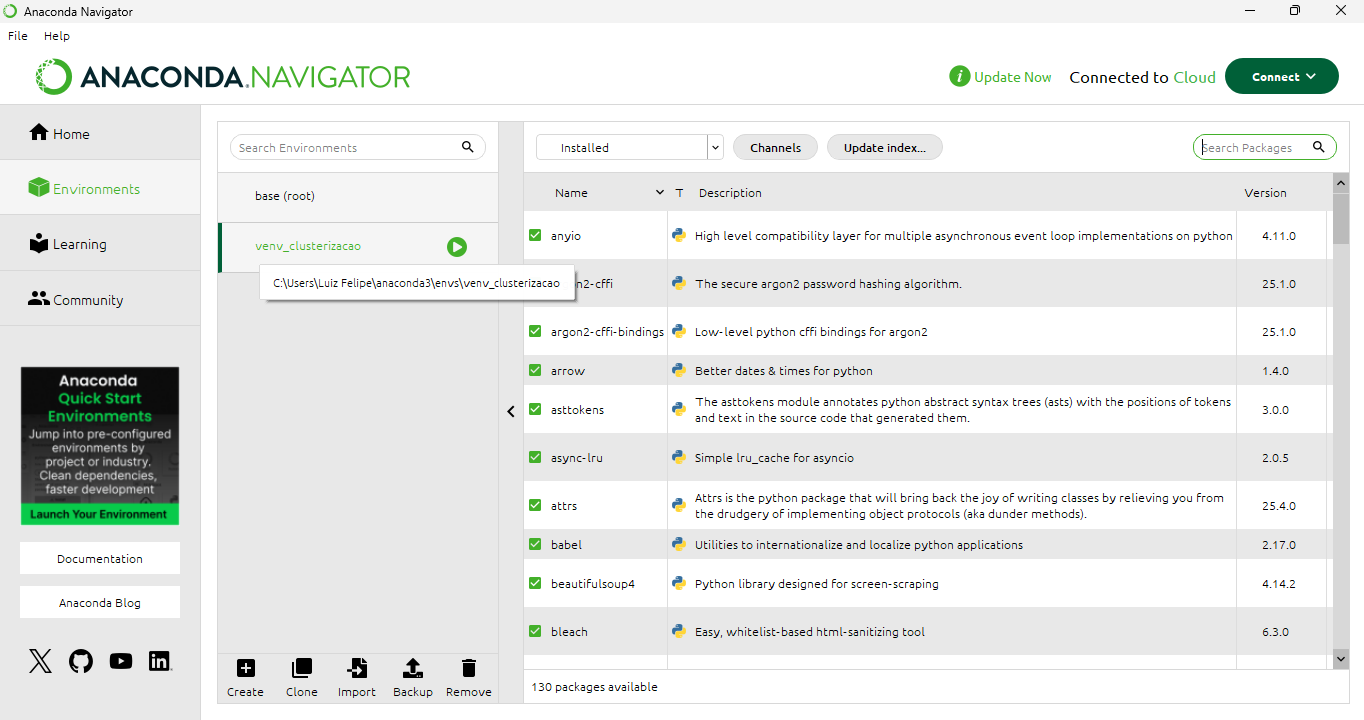

3. ***Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico***

Requisito atendido no arquivo "requeriments.txt", presente no repositório

https://github.com/luizfelipesouzaivo/algoritmos-ia-clusterizacao/blob/main/requirements.txt

4. ***Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.***

In [2]:
!pip freeze > requirements.txt

In [3]:
!pip freeze

absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.11.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.1
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.0
altair==5.5.0
annotated-doc==0.0.3
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.2
arrow==1.4.0
arviz==0.22.0
astropy==7.1.1
astropy-iers-data==0.2025.10.27.0.39.10
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.5
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.4
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.27.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.0
blobfile==3.1.0
blosc2==3.11.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.10.5
cffi==2.0.0
chardet==5.2.0
charset-normalizer==

5. ***Tire um printscreen do ambiente que será usado rodando em sua máquina.***

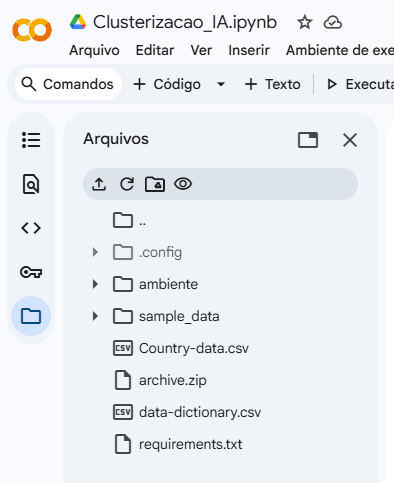

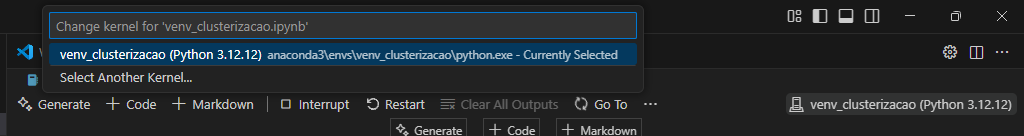

6. ***Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).***

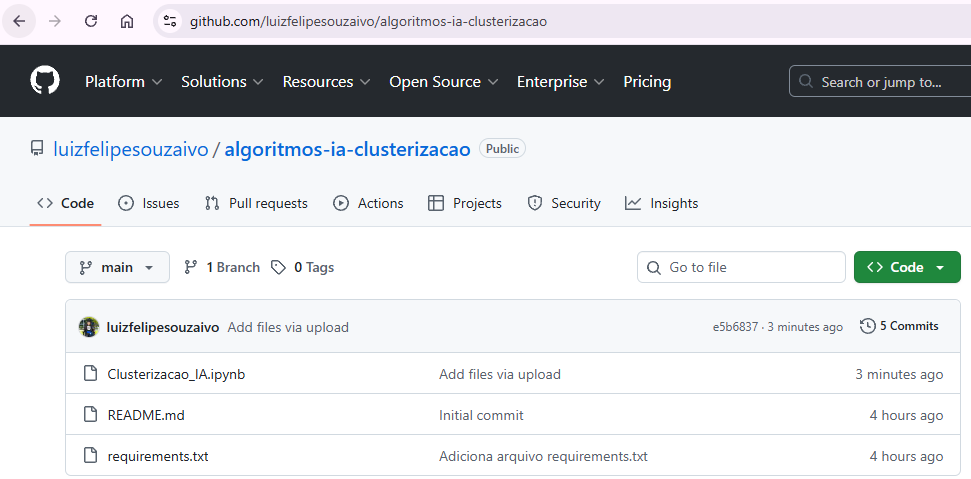

**IMPORTAR OS PACOTES**

In [41]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pkg_resources
import seaborn as sns
import sys
from google.colab import files
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy as sch

**IMPORTAR OS DADOS**

In [5]:
uploaded = files.upload()

Saving archive.zip to archive.zip


In [6]:
zip_path = '/content/archive.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

    extracted_files = os.listdir('/content/')
print(extracted_files)

['.config', 'Country-data.csv', 'requirements.txt', 'data-dictionary.csv', 'archive.zip', 'sample_data']


# **Parte.2. - Escolha de base de dados**

In [21]:
dados.isnull().sum()
dados.info
print(dados)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49   

2. ***Quantos países existem no dataset?***

In [22]:
total_paises = dados['country'].nunique()
print(f'O total de países e: {total_paises}')

O total de países e: 167


2. ***Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?***

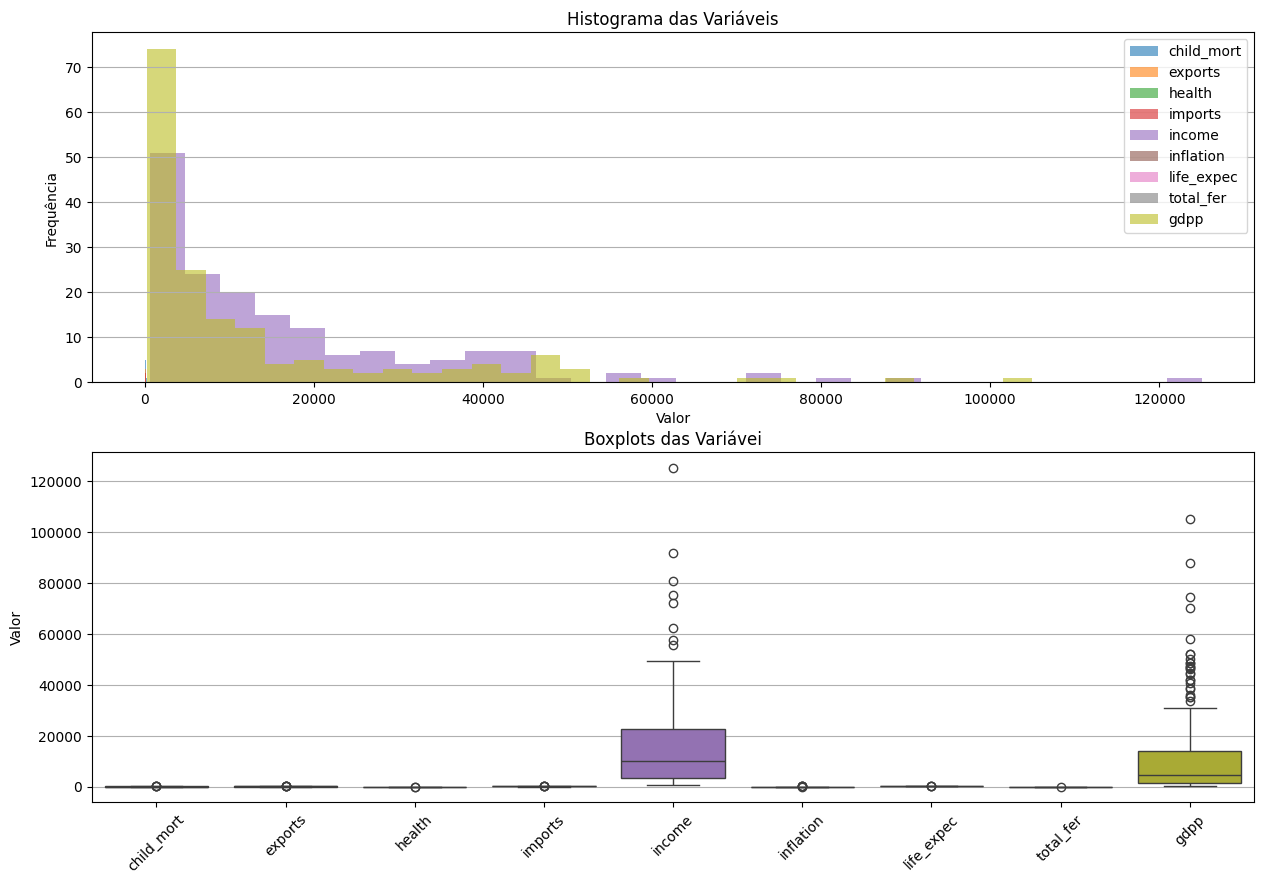

In [23]:
variaveis = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(15, 10))

# Histograma das variáveis
plt.subplot(2, 1, 1)
for var in variaveis:
    plt.hist(dados[var], bins=30, alpha=0.6, label=var)
plt.title('Histograma das Variáveis')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y')

# Boxplot das variáveis
plt.subplot(2, 1, 2)
sns.boxplot(data=dados[variaveis])
plt.title('Boxplots das Variávei')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

***analisar o boxplot de cada variavel***

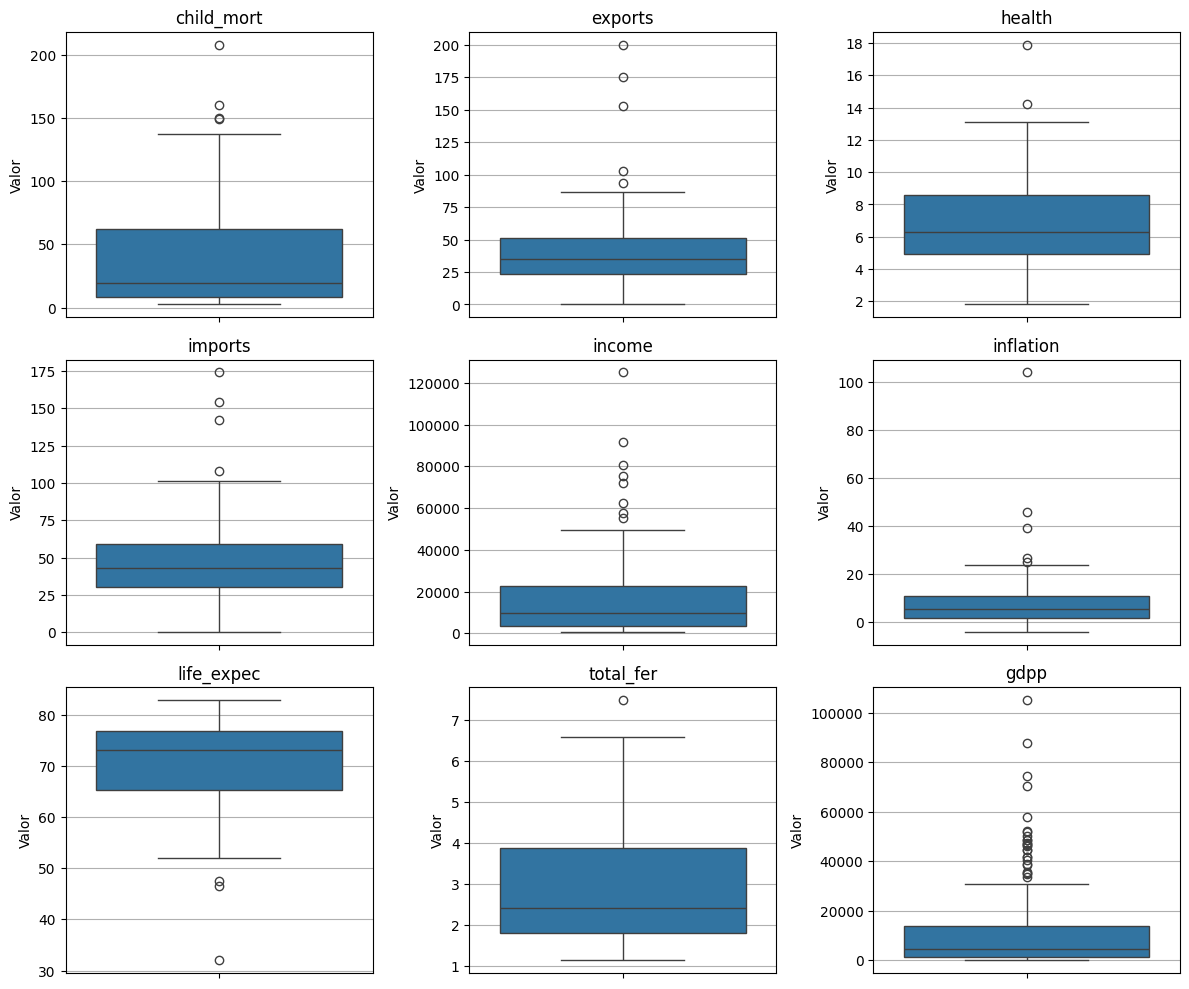

In [24]:
plt.figure(figsize=(12, 10))

# Criando um boxplot para cada variável
for i, var in enumerate(variaveis, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=dados, y=var)
    plt.title(var)
    plt.ylabel('Valor')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

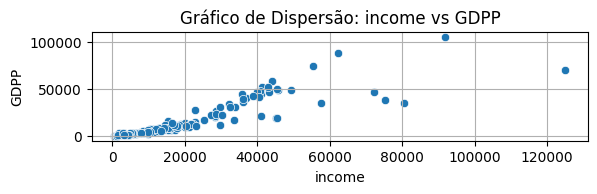

In [25]:
plt.subplot(3, 1, 3)
sns.scatterplot(data=dados, x='income', y='gdpp')
plt.title('Gráfico de Dispersão: income vs GDPP')
plt.xlabel('income')
plt.ylabel('GDPP')
plt.grid()

Os gráficos mostram que a maioria das variáveis tem valores baixos, mas algumas possuem valores bem altos, indicando uma distribuição desigual e presença de outliers. O boxplot confirma isso, principalmente em “income” e “gdp”. Decidi não removê-los, pois em variáveis econômicas e sociais esses valores extremos podem representar características importantes. Em vez disso, optei por padronizar os dados.

2. ***Realize o pré-processamento adequado dos dados.***

In [26]:
variaveis = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Padronizar os dados
scaler = StandardScaler()
numerical_data = dados[variaveis]
dadospadronizados = scaler.fit_transform(numerical_data)
dadospadronizados


array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# **Parte.3. - Clusterização**

**Para os dados pré-processados da etapa anterior você irá:**

3. ***Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:***

*a. K-Médias*


In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dadospadronizados)
dados['Ncluster'] = kmeans.predict(dadospadronizados)
dados

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Ncluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


b. *Clusterização Hierárquica*

In [28]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
Hcluster = cluster.fit_predict(dadospadronizados)
dados['Hcluster'] = Hcluster
dados

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Ncluster,Hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,1


3. ***Para os resultados, do K-Médias:***

***Interprete cada um dos clusters obtidos citando:***

***I. Qual a distribuição das dimensões em cada grupo***

In [29]:
dados_numericos = dados.drop(columns=['country'])

cluster_0 = dados_numericos[dados['Ncluster'] == 0]
cluster_1 = dados_numericos[dados['Ncluster'] == 1]
cluster_2 = dados_numericos[dados['Ncluster'] == 2]

cluster_0_means = cluster_0.mean()
cluster_1_means = cluster_1.mean()
cluster_2_means = cluster_2.mean()

print("Médias do Cluster 0:\n", cluster_0_means)
print("============================================")
print("\nMédias do Cluster 1:\n", cluster_1_means)
print("============================================")
print("\nMédias do Cluster 2:\n", cluster_2_means)

Médias do Cluster 0:
 child_mort       22.456977
exports          40.273128
health            6.251047
imports          47.362394
income        12321.744186
inflation         7.720884
life_expec       72.566279
total_fer         2.340349
gdpp           6461.767442
Ncluster          0.000000
Hcluster          0.965116
dtype: float64

Médias do Cluster 1:
 child_mort        5.000000
exports          58.738889
health            8.807778
imports          51.491667
income        45672.222222
inflation         2.671250
life_expec       80.127778
total_fer         1.752778
gdpp          42494.444444
Ncluster          1.000000
Hcluster          0.138889
dtype: float64

Médias do Cluster 2:
 child_mort      95.106667
exports         28.602444
health           6.301111
imports         42.306667
income        3539.844444
inflation       11.986778
life_expec      59.055556
total_fer        5.065333
gdpp          1766.711111
Ncluster         2.000000
Hcluster         1.600000
dtype: float64


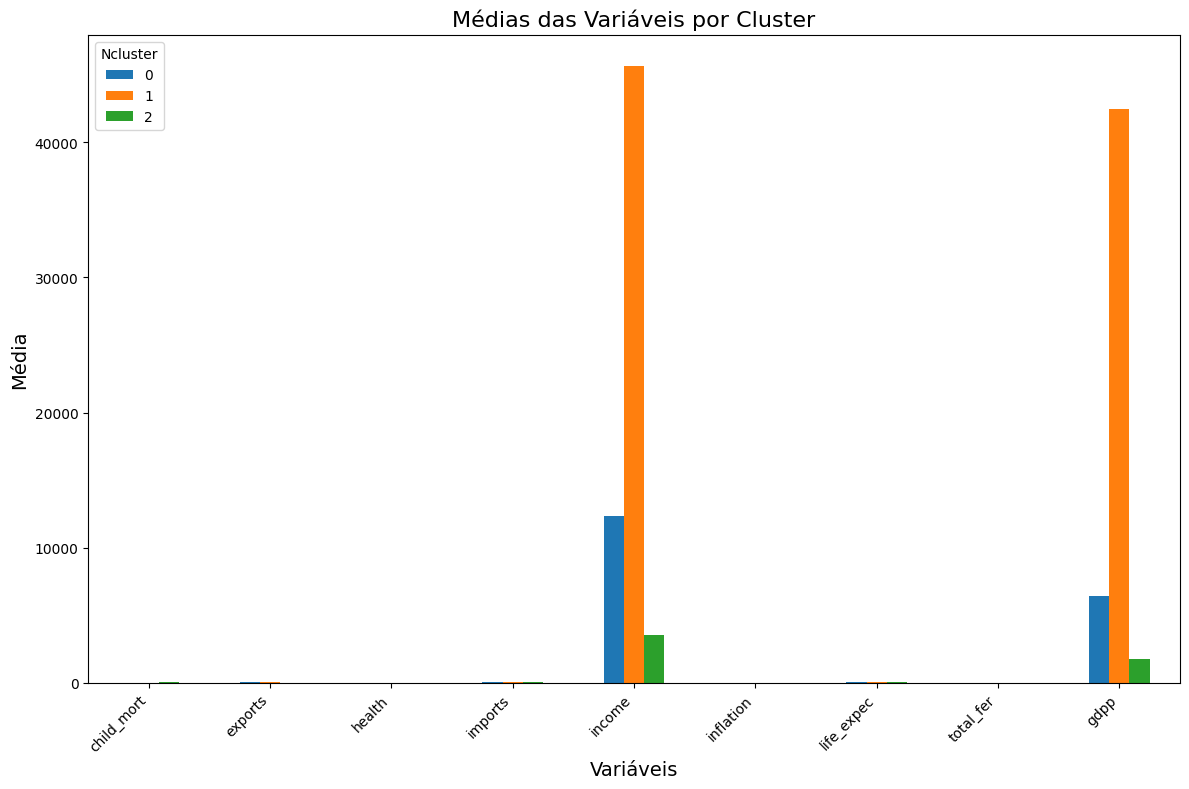

In [30]:
cluster_means = dados.groupby('Ncluster')[['child_mort', 'exports', 'health', 'imports', 'income',
                                      'inflation', 'life_expec', 'total_fer', 'gdpp']].mean()


cluster_means.T.plot(kind='bar', figsize=(12, 8))

plt.title('Médias das Variáveis por Cluster', fontsize=16)
plt.ylabel('Média', fontsize=14)
plt.xlabel('Variáveis', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Os países foram divididos em três clusters com perfis socioeconômicos distintos.


O **Cluster 0** reúne países com indicadores intermediários — renda e
expectativa de vida médias, além de equilíbrio entre exportações e importações.


O **Cluster 1** representa países desenvolvidos, com alta renda, boa expectativa de vida, baixa mortalidade infantil e inflação controlada.


Já o **Cluster 2** agrupa países subdesenvolvidos, com baixa renda, alta mortalidade infantil e maior taxa de fertilidade.


As médias das variáveis evidenciam essas diferenças e mostram as desigualdades entre os grupos.

In [31]:
cluster_0_means = cluster_0.mean().drop(labels=['Ncluster', 'Hcluster'])
cluster_1_means = cluster_1.mean().drop(labels=['Ncluster', 'Hcluster'])
cluster_2_means = cluster_2.mean().drop(labels=['Ncluster', 'Hcluster'])

def plot_cluster_means(cluster_means, cluster_label):
    plt.figure(figsize=(10, 6))
    cluster_means.plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')
    plt.title(f"Distribuição das Dimensões - {cluster_label}", fontsize=14)
    plt.ylabel("Média", fontsize=12)
    plt.xlabel("Dimensões", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

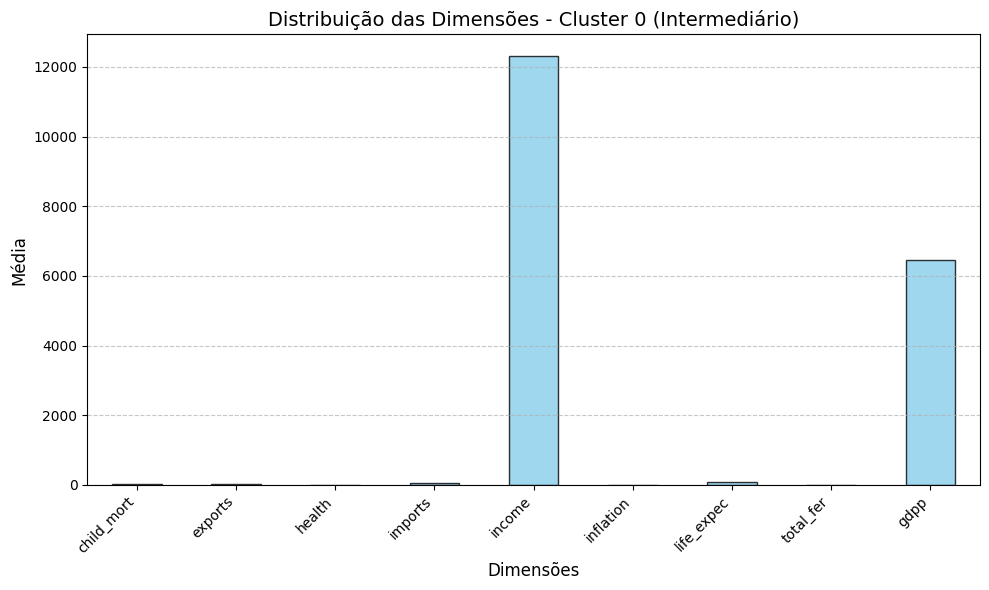

In [32]:
plot_cluster_means(cluster_0_means, "Cluster 0 (Intermediário)")

O gráfico do cluster 0 mostra indicadores médios, como income e gdpp que são moderados em comparação aos outros clusters. Além disso life_expec e child_mort estão em níveis intermediários.

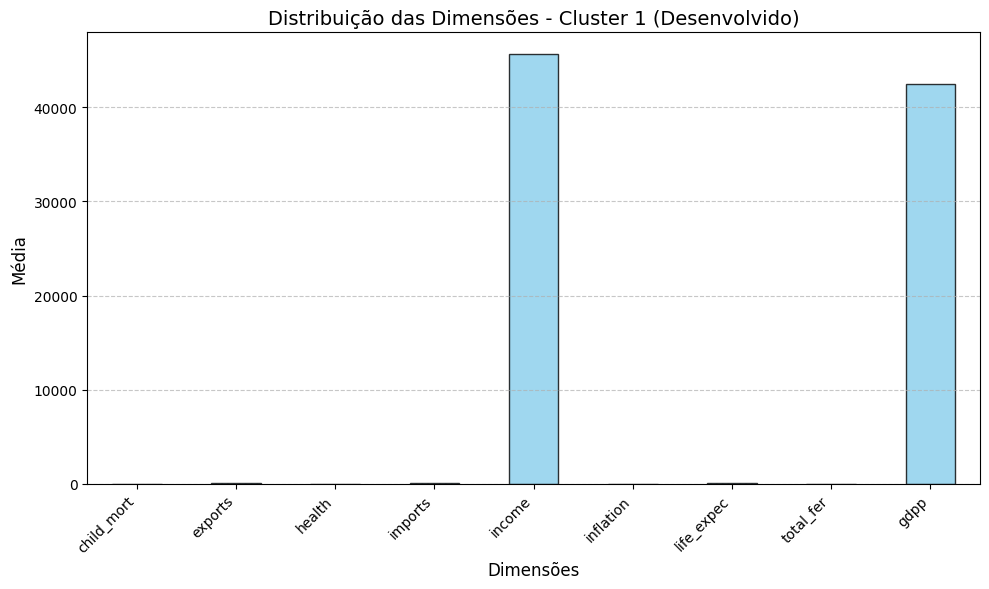

In [33]:
plot_cluster_means(cluster_1_means, "Cluster 1 (Desenvolvido)")

O cluster 1 apresenta alta renda per capita e PIB, combinados com baixa mortalidade infantil e elevada expectativa de vida, indicando que esse grupo corresponde a nações mais desenvolvidas.

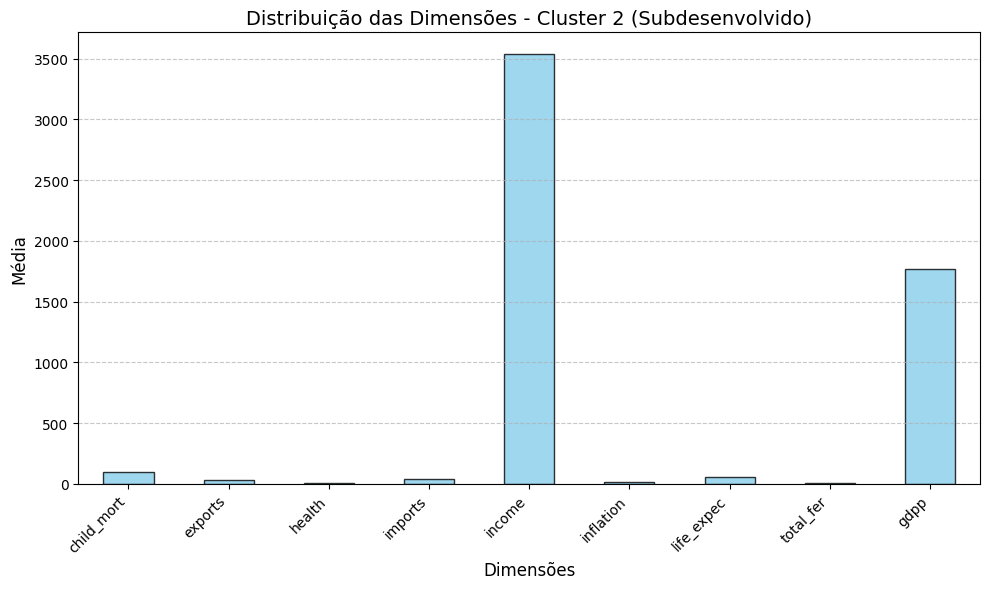

In [34]:
plot_cluster_means(cluster_2_means, "Cluster 2 (Subdesenvolvido)")

O cluster 2 revela renda per capita e PIB muito baixos, aliados a alta mortalidade infantil e baixa expectativa de vida, caracterizando países com menor desenvolvimento socioeconômico.

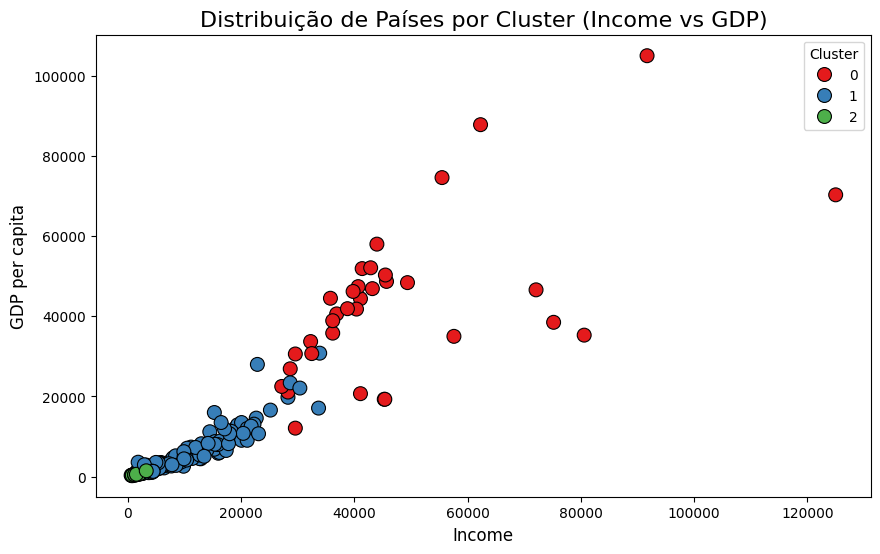

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dados['income'], y=dados['gdpp'], hue=dados['Hcluster'], palette='Set1', s=100, edgecolor='black')

plt.title('Distribuição de Países por Cluster (Income vs GDP)', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('GDP per capita', fontsize=12)

plt.legend(title='Cluster')
plt.show()

***II. O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique***

In [36]:
centroides = kmeans.cluster_centers_
distancias = pairwise_distances(dadospadronizados, centroides)

representantes = []
for cluster in range(len(centroides)):
    indices_cluster = dados[dados['Ncluster'] == cluster].index
    distancias_cluster = distancias[indices_cluster, cluster]
    representante = indices_cluster[np.argmin(distancias_cluster)]
    representantes.append(representante)
paises_representativos = dados.loc[representantes]

paises_representativos['Cluster'] = paises_representativos['Ncluster']

colunas_interesse = ['country', 'child_mort', 'exports', 'health', 'income', 'life_expec','gdpp', 'Ncluster']
resultado = paises_representativos[colunas_interesse]

print("Países que melhor representam cada agrupamento:")
print(resultado)

Países que melhor representam cada agrupamento:
      country  child_mort  exports  health  income  life_expec   gdpp  \
143  Suriname        24.1     52.5    7.01   14200        70.3   8300   
68    Iceland         2.6     53.4    9.40   38800        82.0  41900   
63     Guinea       109.0     30.3    4.93    1190        58.0    648   

     Ncluster  
143         0  
68          1  
63          2  


Pela expectativa de vida

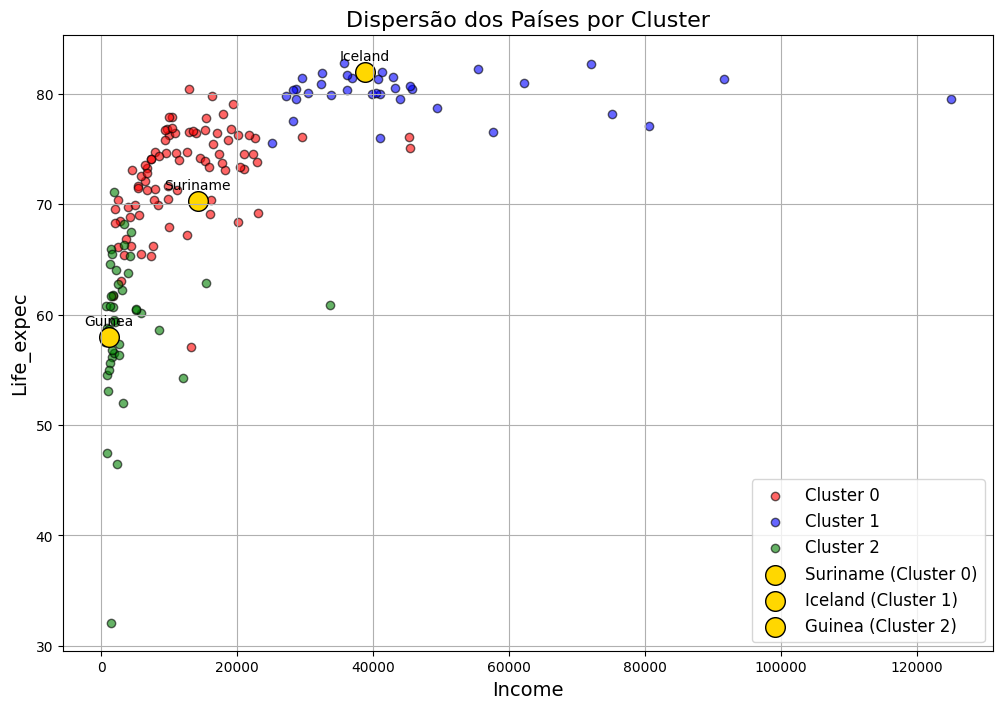

In [37]:
x_var = "income"
y_var = "life_expec"

plt.figure(figsize=(12, 8))

colors = ['red', 'blue', 'green']

for cluster in range(len(centroides)):
    cluster_data = dados[dados['Ncluster'] == cluster]
    plt.scatter(
        cluster_data[x_var],
        cluster_data[y_var],
        label=f'Cluster {cluster}',
        alpha=0.6,
        edgecolor='k',
        color=colors[cluster]
    )
for i, row in paises_representativos.iterrows():
    plt.scatter(
        row[x_var], row[y_var],
        color='gold', edgecolor='black',
        s=200, label=f'{row["country"]} (Cluster {row["Ncluster"]})'
    )
    plt.text(row[x_var], row[y_var] + 1, row["country"], fontsize=10, ha='center')
plt.title('Dispersão dos Países por Cluster', fontsize=16)
plt.xlabel(x_var.capitalize(), fontsize=14)
plt.ylabel(y_var.capitalize(), fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Para verificarmos o pais mais proximo do centroid, vamos calcular a menor distancia

In [38]:
distanciastotal = pairwise_distances(dadospadronizados, centroides, metric='euclidean')

distancias_somadas = distanciastotal.sum(axis=1)

indiceproximo = np.argmin(distancias_somadas)
dados_distancias = pd.DataFrame({
    'Country': dados['country'],
    'Distância': distancias_somadas
})

dados_distancias = dados_distancias.sort_values(by='Distância')

print("países ordenados pela soma das distâncias centróides:")
print(dados_distancias)

países ordenados pela soma das distâncias centróides:
                Country  Distância
143            Suriname   6.707654
118            Paraguay   7.205815
62            Guatemala   7.319962
45   Dominican Republic   7.395992
48          El Salvador   7.457358
..                  ...        ...
98                Malta  19.934598
123               Qatar  20.955172
133           Singapore  26.968112
91           Luxembourg  27.207073
113             Nigeria  30.222679

[167 rows x 2 columns]


In [39]:
pais_mais_proximo = dados.iloc[indiceproximo]

print(f"O país mais próximo de todos os centróides é:")
print(pais_mais_proximo)

O país mais próximo de todos os centróides é:
country       Suriname
child_mort        24.1
exports           52.5
health            7.01
imports           38.4
income           14200
inflation          7.2
life_expec        70.3
total_fer         2.52
gdpp              8300
Ncluster             0
Hcluster             1
Name: 143, dtype: object


O país mais próximo é aquele com a menor soma das distâncias, ou seja, o que está mais perto dos centróides que representam os clusters formados.

3. ***Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados***

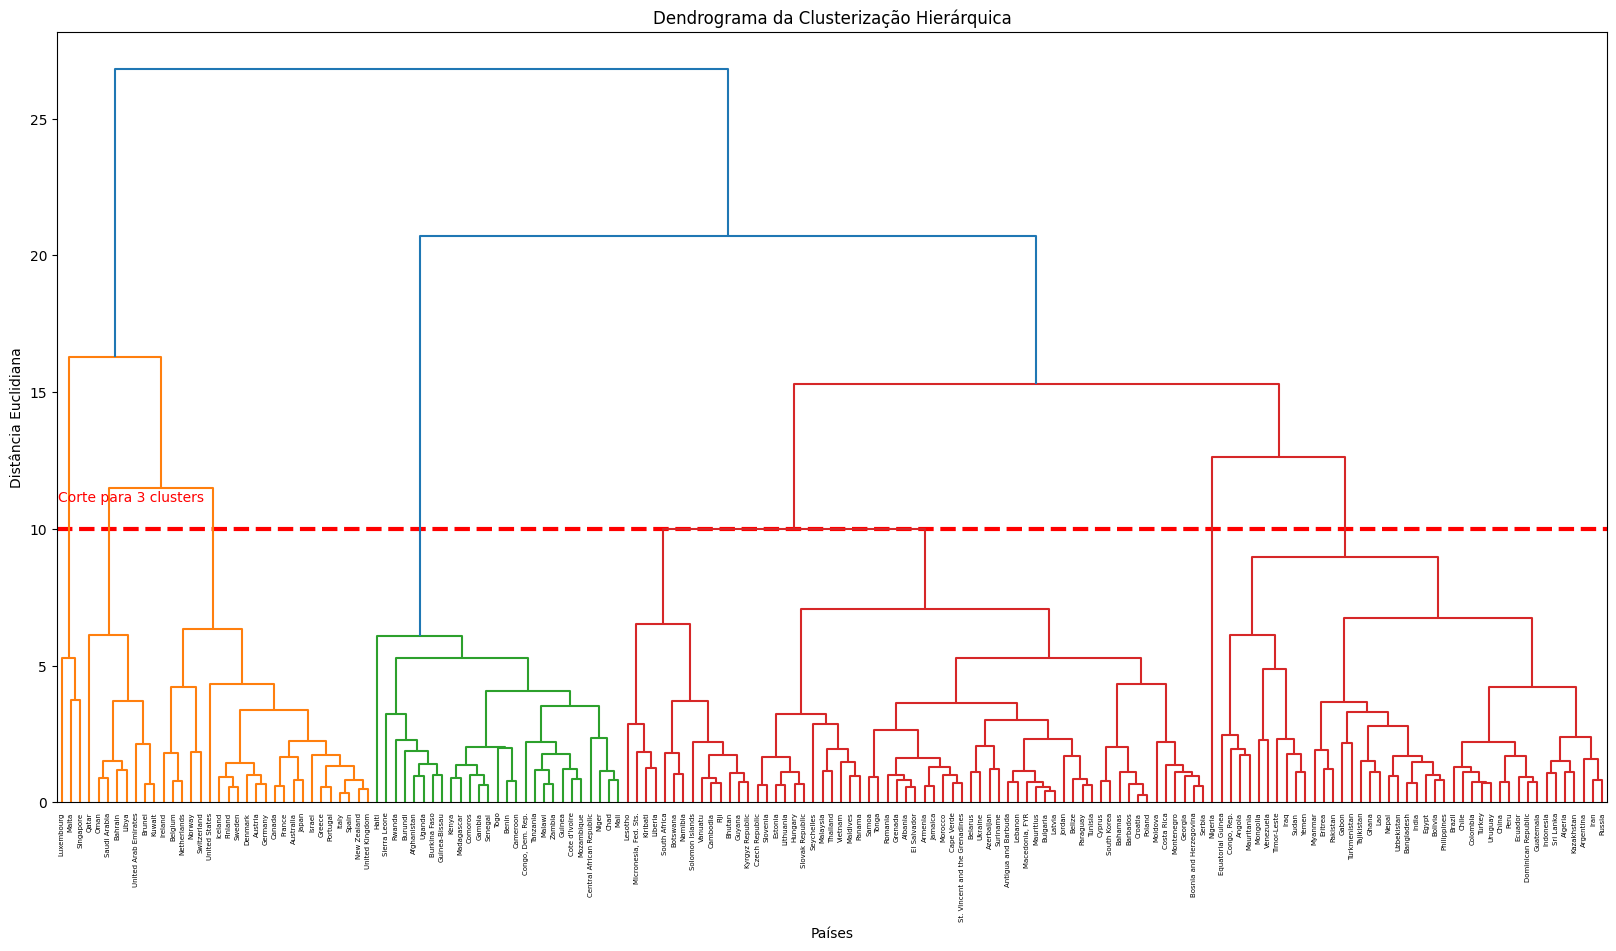

In [42]:
Z = sch.linkage(dadospadronizados, method='ward')
plt.figure(figsize=(20, 10))
plt.title('Dendrograma da Clusterização Hierárquica')
plt.xlabel('Países')
plt.ylabel('Distância Euclidiana')


plt.hlines(y=10, xmin=0, xmax=2000, lw=3, linestyles='--', color='red')
plt.text(x=0.9, y=11, s='Corte para 3 clusters', fontsize=10, color='red')
sch.dendrogram(Z, labels=dados['country'].values, leaf_rotation=90, leaf_font_size=5)
plt.show()

O dendrograma mostra como os países foram agrupados de acordo com suas semelhanças socioeconômicas. Quanto menor a distância no eixo Y, mais parecidos eles são. Defini uma linha na altura 10, formando três grupos principais que correspondem aos clusters.

**Cluster laranja**: inclui países como Luxemburgo e Singapura, que se destacam por serem bem diferentes da maioria — alta renda, baixa mortalidade infantil e alta expectativa de vida.

**Cluster verde**: reúne países como Afeganistão e Angola, com características semelhantes, como baixa renda, alta mortalidade infantil e baixa expectativa de vida.

**Cluster vermelho**: é o maior grupo, com países como Suriname, Argélia e Albânia. Eles têm indicadores intermediários e representam economias em desenvolvimento, com níveis moderados de renda e expectativa de vida.

3. ***Compare os dois resultados, aponte as semelhanças e diferenças e interprete.***

Os dois métodos mostraram resultados parecidos, agrupando os países de forma consistente.

O **Cluster 0** representa os países desenvolvidos, como Luxemburgo e Singapura. Ambos os métodos identificaram esse grupo, com indicadores altos de renda, expectativa de vida e baixa mortalidade infantil.

O **Cluster 1** reúne países emergentes, com características intermediárias e desenvolvimento mais equilibrado. K-means e a clusterização hierárquica chegaram a resultados muito semelhantes nesse grupo.

O **Cluster 2** inclui os países menos desenvolvidos, como Afeganistão e Angola, marcados por baixa renda, alta mortalidade infantil e menor expectativa de vida.

A principal diferença entre os métodos está na forma de agrupar:

O K-means usa a distância até os centróides, sendo mais rápido e ideal para grandes volumes de dados, mas pode deixar passar relações mais sutis.

Já a Clusterização Hierárquica mostra como os países se aproximam gradualmente, revelando subgrupos e nuances que o K-means não capta tão bem.

# **Parte.4. - Escolha de algoritmos**

4. ***Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.***

Usamos a biblioteca KMeans do sklearn.cluster para aplicar o algoritmo.

Primeiro, definimos o número de clusters, geralmente com o método do cotovelo, que indica o ponto ideal de divisão dos grupos. Em seguida, o algoritmo escolhe centróides iniciais — aleatoriamente ou com o K-means++, que melhora a precisão.

Cada ponto é então atribuído ao centróide mais próximo (normalmente usando a distância euclidiana). Depois, o centróide de cada grupo é recalculado com base na média dos pontos atribuídos a ele.

Esse processo se repete até que os centróides parem de mudar significativamente, indicando que o modelo convergiu e os clusters foram formados de forma estável.

4. **O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo. Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.**

Convergiu na iteração 5


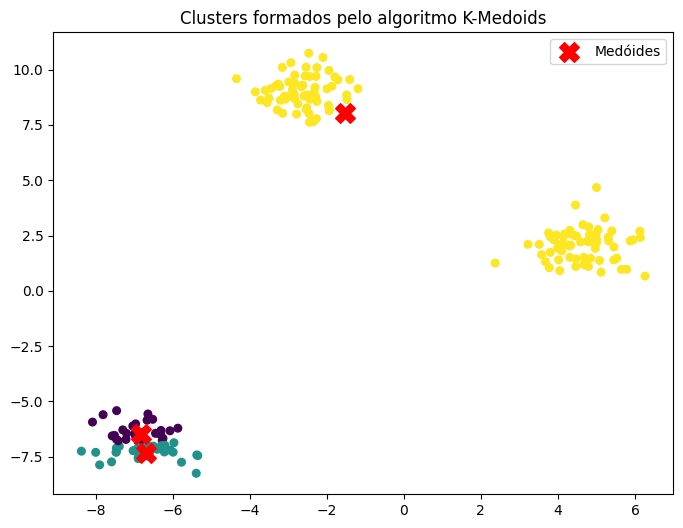

In [60]:
# Gerar dados de exemplo (você pode substituir pelos seus)
X, _ = make_blobs(n_samples=200, centers=3, cluster_std=0.7, random_state=42)

# Número de clusters
k = 3

# Inicializar aleatoriamente os índices dos medóides
np.random.seed(42)
medoid_indices = np.random.choice(len(X), k, replace=False)
medoids = X[medoid_indices]

# Função para calcular distância Euclidiana
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Função principal do K-Medoids
def k_medoids(X, k, max_iter=100):
    np.random.seed(42)
    medoid_indices = np.random.choice(len(X), k, replace=False)
    medoids = X[medoid_indices]

    for i in range(max_iter):
        # Atribuir cada ponto ao medóide mais próximo
        labels = np.argmin([[euclidean_distance(x, m) for m in medoids] for x in X], axis=1)

        new_medoids = np.copy(medoids)

        # Atualizar medóides
        for j in range(k):
            cluster_points = X[labels == j]
            if len(cluster_points) > 0:
                # Calcular o ponto com menor soma de distâncias dentro do cluster
                distances = np.array([[euclidean_distance(p1, p2) for p2 in cluster_points] for p1 in cluster_points])
                total_distance = np.sum(distances, axis=1)
                new_medoids[j] = cluster_points[np.argmin(total_distance)]

        # Verificar convergência
        if np.all(new_medoids == medoids):
            print(f"Convergiu na iteração {i+1}")
            break

        medoids = new_medoids

    return medoids, labels

# Executar o algoritmo
final_medoids, labels = k_medoids(X, k)

# Visualizar resultado
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.scatter(final_medoids[:,0], final_medoids[:,1], c='red', marker='X', s=200, label='Medóides')
plt.title('Clusters formados pelo algoritmo K-Medoids')
plt.legend()
plt.show()


4. ***O algoritmo de K-médias é sensível a outliers nos dados. Explique.***

O algoritmo K-Means é sensível a outliers porque usa a média para definir os centróides. Isso faz com que pontos muito distantes puxem o centróide para fora da região onde estão a maioria dos dados. Como resultado, os clusters podem ficar distorcidos e a qualidade da segmentação diminui.

 4. ***Por que o algoritmo de DBScan é mais robusto à presença de outliers?***

In [47]:
db = DBSCAN(eps=1.2, min_samples=4,metric='euclidean',p=2).fit(dadospadronizados)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
dados['Cluster_Db']=labels
ncluster=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
print(Z[0:5])
print("numero labels: ", set(labels))

[[ 41.         121.           0.27051092   2.        ]
 [ 75.         139.           0.34593963   2.        ]
 [ 24.          85.           0.42313147   2.        ]
 [111.         158.           0.49433038   2.        ]
 [ 60.         122.           0.54410516   2.        ]]
numero labels:  {np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}


In [48]:
dados.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Ncluster,Hcluster,Cluster_Db
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1,1


/tmp/ipython-input-1618023409.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=20)


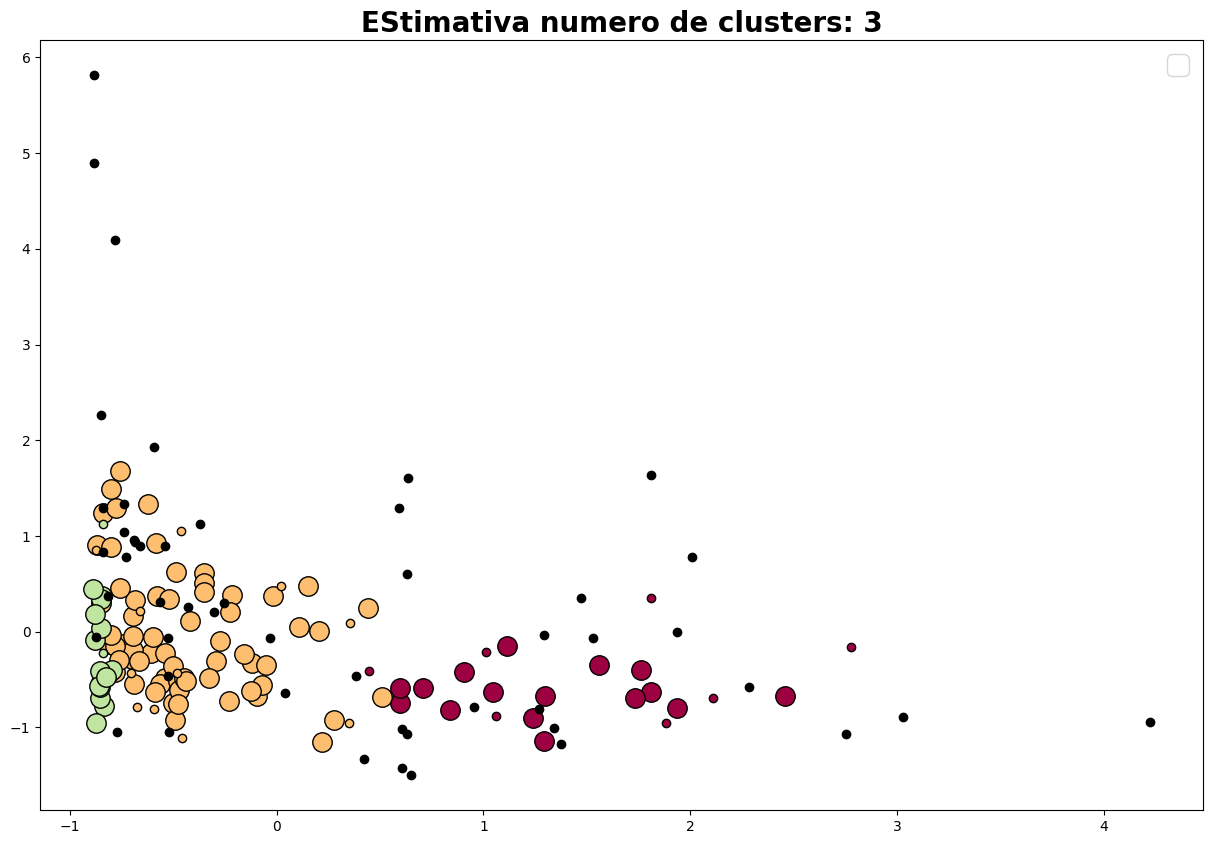

50


In [49]:
plt.figure(figsize=(15,10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
  if k == -1:
      col = [0, 0, 0, 1]
  class_member_mask = (labels == k)
  xy = dadospadronizados[class_member_mask & core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
  xy = dadospadronizados[class_member_mask & ~core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)

plt.title('EStimativa numero de clusters: %d' % ncluster, fontweight='bold',fontsize=20)

plt.legend(fontsize=20)
plt.show()
n_noise_ = list(labels).count(-1)
print( n_noise_)

O DBSCAN é mais robusto a outliers porque usa a densidade dos dados em vez de médias ou centróides. Pontos que não se encaixam nos grupos são marcados como ruídos (-1) e excluídos dos clusters, tornando o algoritmo mais resistente a valores extremos.